In [1]:
from ultralytics import YOLOv10
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

In [ ]:
# YOLO10 sizes: n s m b l x

model = YOLOv10.from_pretrained('jameslahm/yolov10m')

In [2]:
# load the image, no need to pre-process

# source = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# source = "http://images.cocodataset.org/test-stuff2017/000000024590.jpg"
source = "https://images.squarespace-cdn.com/content/v1/6125a87e4ceb55443b102657/add436db-e3ed-42bb-b611-0d221f85dfbc/NMGS2886.jpg"

In [3]:
# run prediction
results = model.predict(source=source, save=False)


Found https://images.squarespace-cdn.com/content/v1/6125a87e4ceb55443b102657/add436db-e3ed-42bb-b611-0d221f85dfbc/NMGS2886.jpg locally at NMGS2886.jpg
image 1/1 /Users/ginomcfino/Github/ObjectDetectionModels/NMGS2886.jpg: 448x640 2 persons, 3 cars, 1 traffic light, 1 handbag, 148.9ms
Speed: 1.8ms preprocess, 148.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


In [4]:
# post-processing

image = Image.open(requests.get(source, stream=True).raw)

In [15]:
print(results[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  9., 26.,  2.,  2.,  2.,  0.])
conf: tensor([0.9538, 0.6129, 0.4771, 0.4165, 0.3818, 0.3681, 0.3559])
data: tensor([[2.7959e+02, 3.0467e+02, 1.2036e+03, 1.3495e+03, 9.5382e-01, 0.0000e+00],
        [4.1000e+01, 1.1184e+03, 7.9954e+01, 1.2062e+03, 6.1293e-01, 9.0000e+00],
        [3.4413e+02, 1.1523e+03, 8.4683e+02, 1.3596e+03, 4.7705e-01, 2.6000e+01],
        [1.1859e+03, 1.2674e+03, 1.4495e+03, 1.3610e+03, 4.1653e-01, 2.0000e+00],
        [1.2580e+03, 1.2727e+03, 1.4251e+03, 1.3285e+03, 3.8185e-01, 2.0000e+00],
        [1.5000e+03, 1.2244e+03, 1.8097e+03, 1.3144e+03, 3.6808e-01, 2.0000e+00],
        [1.5836e+03, 1.2117e+03, 1.6312e+03, 1.2558e+03, 3.5595e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1365, 2048)
shape: torch.Size([7, 6])
xywh: tensor([[ 741.6107,  827.0762,  924.0331, 1044.8109],
        [  60.4775, 1162.3113,   38.9539,   87.7760],
        [ 595.4791, 1255.9651,  502.6947,  207.2770

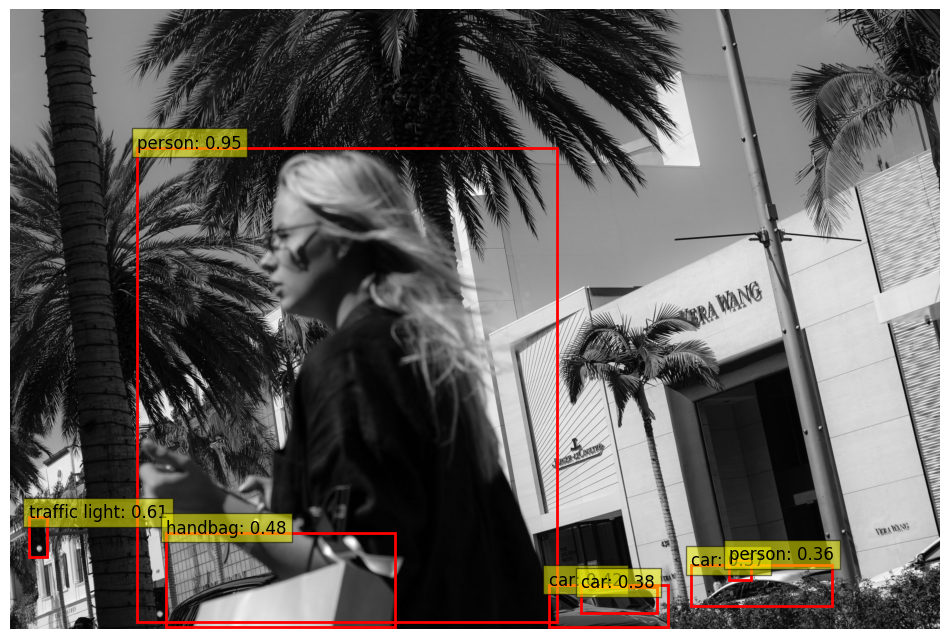

In [5]:
# Plot the image with bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Accessing the bounding boxes and other details
for result in results[0].boxes:
    box = result.xyxy[0].tolist()
    confidence = result.conf[0].item()
    class_id = result.cls[0].item()
    xmin, ymin, xmax, ymax = box
    width, height = xmax - xmin, ymax - ymin
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    label = f'{model.names[int(class_id)]}: {confidence:.2f}'
    ax.text(xmin, ymin, label, fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

plt.axis('off')
plt.show()